## Black Friday Dataset EDA and Feature Engineering
## Cleaning and Preparing the Data for Model Training

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv(r"C:\Users\doguy\Desktop\Black_Friday\train.csv")
df_train.shape

(550068, 12)

# Problem Statement

A retail company "ABC PRIVATE LIMITED" wants to understand the customer purchase behaviour (Purchase Amount) against various products of 
differenct categories. They have shared purchase summary of various customers for sleected high volume products from last month

The data set also contains customer demographics (age, gender, martial status, city, stay_in_current_city), product details and Total puchase_amount fro mlast month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for custoemrs against
different products.

In [3]:
# import the test data

df_test = pd.read_csv(r"C:\Users\doguy\Desktop\Black_Friday\test.csv")
df_test.shape

(233599, 11)

In [4]:
# Merge both train and test data

df = df_train.append(df_test)
df.head()
df.shape

(783667, 12)

In [5]:
## Basic
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.drop(['User_ID'], axis = 1, inplace = True)

In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
pd.get_dummies(df['Gender'])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [10]:
# Handling the Categorical feature "Gender"
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
## Handle Categorical feature "Age"

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['Age'] = df['Age'].map({'46-50':7,'0-17' :6,'55+':5,'51-55':4,'36-45':3,'18-25':2,'26-35':1,})
df.Age.unique()

#Don't put "Zero"
#Also you can use Label Encoding 

array([6, 5, 1, 7, 4, 3, 2], dtype=int64)

In [13]:
df.Age

0         6
1         6
2         6
3         6
4         5
         ..
233594    1
233595    1
233596    1
233597    7
233598    7
Name: Age, Length: 783667, dtype: int64

In [14]:
df_city = pd.get_dummies(df['City_Category'],drop_first=True)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [15]:
df = pd.concat([df,df_city],axis = 1)

In [16]:
df.drop('City_Category',axis = 1,inplace=True)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,6,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,6,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,6,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,6,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,5,16,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
## Missing Values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
## Focus on Replacing Missing Values

def takemod(df,Variable):
    df[Variable] = df[Variable].fillna(df[Variable].mode()[0])
    return df[Variable].isnull().sum()

takemod(df, 'Product_Category_2')
takemod(df, 'Product_Category_3')

0

In [20]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [21]:
df.rename(columns = {'Stay_In_Current_City_Years': 'Current_City'},inplace = True)
df.Current_City = df.Current_City.str.replace('+','')

C:\Users\doguy\AppData\Local\Temp/ipykernel_11952/1193162104.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Current_City = df.Current_City.str.replace('+','')


In [22]:
df.head()

,Product_ID,Gender,Age,Occupation,Current_City,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,6,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,6,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,6,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,6,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,5,16,4,0,8,8.0,16.0,7969.0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Product_ID          783667 non-null  object 
 1   Gender              783667 non-null  int64  
 2   Age                 783667 non-null  int64  
 3   Occupation          783667 non-null  int64  
 4   Current_City        783667 non-null  object 
 5   Marital_Status      783667 non-null  int64  
 6   Product_Category_1  783667 non-null  int64  
 7   Product_Category_2  783667 non-null  float64
 8   Product_Category_3  783667 non-null  float64
 9   Purchase            550068 non-null  float64
 10  B                   783667 non-null  uint8  
 11  C                   783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [24]:
# Current_City has to be an integer, not an object

df.Current_City = df['Current_City'].astype(int)
#also
df['B'] = df.B.astype(int) 
df['C'] = df.C.astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Product_ID          783667 non-null  object 
 1   Gender              783667 non-null  int64  
 2   Age                 783667 non-null  int64  
 3   Occupation          783667 non-null  int64  
 4   Current_City        783667 non-null  int32  
 5   Marital_Status      783667 non-null  int64  
 6   Product_Category_1  783667 non-null  int64  
 7   Product_Category_2  783667 non-null  float64
 8   Product_Category_3  783667 non-null  float64
 9   Purchase            550068 non-null  float64
 10  B                   783667 non-null  int32  
 11  C                   783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


C:\Users\doguy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

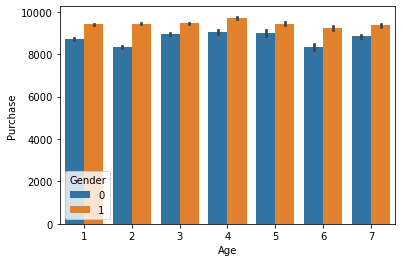

In [25]:
## Visualisation Age vs Purchase
sns.barplot('Age','Purchase',hue='Gender',data  =df)

## Purchasing of men is hight then women

In [26]:
## Visualization of Purchase with Occupation

C:\Users\doguy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

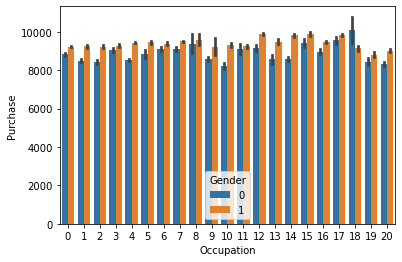

In [27]:
sns.barplot('Occupation','Purchase',hue='Gender',data  =df)

In [29]:
df.drop('Product_ID', axis = 1 , inplace = True)

In [30]:
df_test = df[df['Purchase'].isnull()]
df_test.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Current_City               0
Marital_Status             0
Product_Category_1         0
Product_Category_2         0
Product_Category_3         0
Purchase              233599
B                          0
C                          0
dtype: int64

In [33]:
df_train = df[~df['Purchase'].isnull()]
df_train.isnull().sum()

Gender                0
Age                   0
Occupation            0
Current_City          0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
B                     0
C                     0
dtype: int64

In [37]:
X = df_train.drop('Purchase',axis=1)
y = df_train['Purchase']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)